In [1]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from tabulate import tabulate
import warnings
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_squared_error


In [2]:
current_dir = os.getcwd() 
relative_path = os.path.join('..','..', 'data', 'x_train.csv')
x_train=pd.read_csv(os.path.join(current_dir, relative_path))
relative_path = os.path.join('..','..', 'data', 'y_train.csv')
y_train=pd.read_csv(os.path.join(current_dir, relative_path))

relative_path = os.path.join('..','..', 'data', 'x_val.csv')
x_val=pd.read_csv(os.path.join(current_dir, relative_path))
relative_path = os.path.join('..','..', 'data', 'y_val.csv')
y_val=pd.read_csv(os.path.join(current_dir, relative_path))

relative_path = os.path.join('..','..', 'data', 'x_test.csv')
x_test=pd.read_csv(os.path.join(current_dir, relative_path))
relative_path = os.path.join('..','..', 'data', 'y_test.csv')
y_test=pd.read_csv(os.path.join(current_dir, relative_path))

relative_path = os.path.join('..','..', 'data', 'x_train_smote.csv')
x_train_smote=pd.read_csv(os.path.join(current_dir, relative_path))
relative_path = os.path.join('..','..', 'data', 'y_train_smote.csv')
y_train_smote=pd.read_csv(os.path.join(current_dir, relative_path))

relative_path = os.path.join('..','..', 'data', 'x_train_ros.csv')
x_train_ros=pd.read_csv(os.path.join(current_dir, relative_path))
relative_path = os.path.join('..','..', 'data', 'y_train_ros.csv')
y_train_ros=pd.read_csv(os.path.join(current_dir, relative_path))

relative_path = os.path.join('..','..', 'data', 'x_train_rur.csv')
x_train_rur=pd.read_csv(os.path.join(current_dir, relative_path))
relative_path = os.path.join('..','..', 'data', 'y_train_rur.csv')
y_train_rur=pd.read_csv(os.path.join(current_dir, relative_path))

relative_path = os.path.join('..','..', 'data', 'x_train_smotetomek.csv')
x_train_smotetomek=pd.read_csv(os.path.join(current_dir, relative_path))
relative_path = os.path.join('..','..', 'data', 'y_train_smotetomek.csv')
y_train_smotetomek=pd.read_csv(os.path.join(current_dir, relative_path))




**Trying with x_train , y_train**

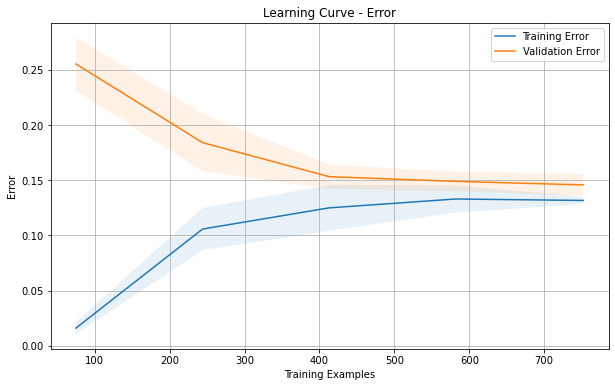

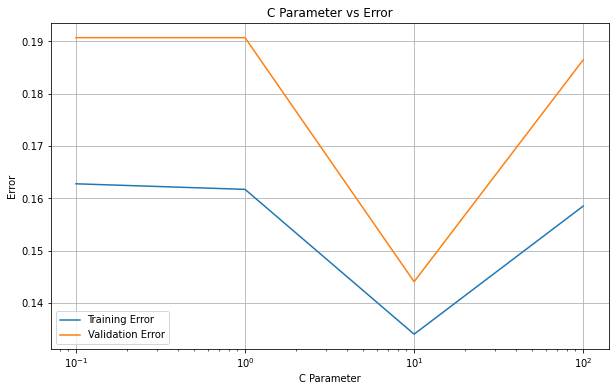

In [3]:
warnings.filterwarnings("ignore")

# LinearSVC model with grid search for parameters
param_grid = {'C': [0.1, 1, 10, 100],
              'penalty': ['l1', 'l2'],
              'loss': ['hinge', 'log','exponential'],
              'dual': [True, False],
              'tol': [1e-4, 1e-3, 1e-2]}
svm = GridSearchCV(LinearSVC(), param_grid, cv=5)
svm.fit(x_train, y_train)
best_C = svm.best_params_['C']
best_penalty = svm.best_params_['penalty']
best_loss = svm.best_params_['loss']
best_dual = svm.best_params_['dual']
best_tol = svm.best_params_['tol']

# Learning curve
train_sizes, train_scores, val_scores = learning_curve(LinearSVC(C=best_C, penalty=best_penalty, loss=best_loss, dual=best_dual, tol=best_tol), x_train, y_train, cv=5)
train_errors = 1 - np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_errors = 1 - np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, label='Training Error')
plt.fill_between(train_sizes, train_errors - train_std, train_errors + train_std, alpha=0.1)
plt.plot(train_sizes, val_errors, label='Validation Error')
plt.fill_between(train_sizes, val_errors - val_std, val_errors + val_std, alpha=0.1)
plt.title('Learning Curve - Error')
plt.xlabel('Training Examples')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

# C parameter vs error
C_values = [0.1, 1, 10, 100]
train_errors = []
test_errors = []
for C in C_values:
    svm = LinearSVC(C=C, penalty=best_penalty, loss=best_loss, dual=best_dual, tol=best_tol)
    svm.fit(x_train, y_train)
    y_train_pred = svm.predict(x_train)
    y_val_pred = svm.predict(x_val)
    train_errors.append(1 - svm.score(x_train, y_train))  # Error is 1 - accuracy
    test_errors.append(1 - svm.score(x_val, y_val))  # Error is 1 - accuracy

plt.figure(figsize=(10, 6))
plt.plot(C_values, train_errors, label='Training Error')
plt.plot(C_values, test_errors, label='Validation Error')
plt.xscale('log')
plt.xlabel('C Parameter')
plt.ylabel('Error')
plt.title('C Parameter vs Error')
plt.legend()
plt.grid(True)
plt.show()


Parameters of Best Model:
C: 10
Penalty: l2
Loss: hinge
Dual: True
Tol: 0.01
Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       191
           1       0.80      0.36      0.49        45

    accuracy                           0.86       236
   macro avg       0.83      0.67      0.71       236
weighted avg       0.85      0.86      0.84       236



<Figure size 576x432 with 0 Axes>

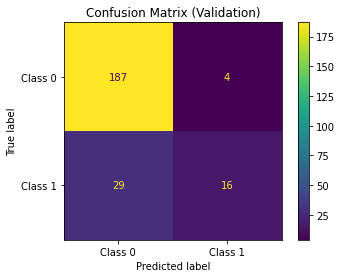

Training Accuracy (Best Model): 0.8680851063829788
Validation Accuracy (Best Model): 0.8601694915254238
Weighted Average F1 Score (Validation): 0.837573557912541


In [6]:
print(f"Parameters of Best Model:")
print(f"C: {best_C}")
print(f"Penalty: {best_penalty}")
print(f"Loss: {best_loss}")
print(f"Dual: {best_dual}")
print(f"Tol: {best_tol}")

# Train the best model on the training set
best_svm = LinearSVC(C=best_C, penalty=best_penalty, loss=best_loss, dual=best_dual, tol=best_tol)
best_svm.fit(x_train, y_train)

# Make predictions on the validation set
y_val_pred = best_svm.predict(x_val)

# Print the classification report for the validation set
print("Classification Report (Validation):")
print(classification_report(y_val, y_val_pred))

# Plot the confusion matrix for the validation set
plt.figure(figsize=(8, 6))
plot_confusion_matrix(best_svm, x_val, y_val, display_labels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix (Validation)')
plt.show()

# Calculate the training and validation accuracies for the best model
best_training_acc = best_svm.score(x_train, y_train)
best_validation_acc = best_svm.score(x_val, y_val)
# Calculate the weighted average F1 score for the validation set
weighted_avg_f1 = f1_score(y_val, y_val_pred, average='weighted')

# Print the training and validation accuracies
print(f"Training Accuracy (Best Model): {best_training_acc}")
print(f"Validation Accuracy (Best Model): {best_validation_acc}")
print(f"Weighted Average F1 Score (Validation): {weighted_avg_f1}")


Testing Accuracy: 0.9013605442176871
F1-Score (Test): 0.8851406158657338


<Figure size 576x432 with 0 Axes>

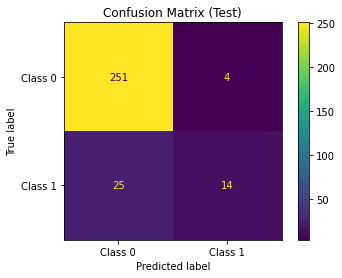

In [7]:
# Combine X_train and X_val
x_train_val = np.concatenate((x_train, x_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)

# Train the model with the best hyperparameters on the combined training and validation sets
best_svm = LinearSVC(C=best_C, penalty=best_penalty, loss=best_loss, dual=best_dual, tol=best_tol)
best_svm.fit(x_train_val, y_train_val)

# Calculate the testing accuracy
testing_acc = best_svm.score(x_test, y_test)
print(f"Testing Accuracy: {testing_acc}")

# Make predictions on the test set
y_test_pred = best_svm.predict(x_test)

# Calculate the f1-score
f1 = f1_score(y_test, y_test_pred, average='weighted')
print(f"F1-Score (Test): {f1}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(best_svm, x_test, y_test, display_labels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix (Test)')
plt.show()
